In [142]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [143]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


In [145]:
print('seaborn: {}'.format(sns.__version__))

seaborn: 0.12.2


In [147]:
print('pandas: {}'.format(np.__version__))

pandas: 1.23.5


In [148]:
print('numpy: {}'.format(pd.__version__))

numpy: 1.5.3


In [40]:
# Read CSV
df = pd.read_csv("loan.csv",low_memory=False)

In [41]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [42]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.shape

(39717, 111)

In [44]:
# checking of percentage of null values for all coumns
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [45]:
# Remving all columns what have 100% Null values
df.dropna(how='all', axis=1, inplace=True)

In [46]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

Columns with null values based on percentage
1. desc - 33.0
2. mths_since_last_delinq - 65.0
3. mths_since_last_record - 93.0
4. next_pymnt_d - 97.0
5. pub_rec_bankruptcies - 2.0
Those columns that have null values more than 30% can be dropped


In [47]:
df = df.loc[:, df.isnull().mean() < 0.3]

In [48]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [49]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

emp_title                     6.0
emp_length                    3.0
These two columns have some missing values which is very less

In [50]:
# date of loan amount issued is not in the right format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [51]:
# add new column year. Useful in case we want to group by year
df['year'] =df['issue_d'].dt.year

In [52]:
# add new column month. Useful in case we want to group by year
df['month'] =df['issue_d'].dt.month

In [53]:
df['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [54]:
df.shape

(39717, 55)

In [55]:
# emp_title has some msising values and its a catergorical variable. Using mode or median might not be right.
# We will introduce new category as not specified
df['emp_title'].fillna('Not Specified', inplace=True)

In [56]:
df['emp_title'].isnull().values.any()

False

According to data dictionary of column emp_length -> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So we need to fix this column 

In [57]:
df['emp_length'] = df['emp_length'].str.rstrip('years ').str.rstrip('year ')
df['emp_length'].replace({'10+': '10'}, inplace=True)
df['emp_length'].replace({'< 1': '0'}, inplace=True)

In [58]:
df['emp_length'].skew()

0.20084133892127248

In [59]:
# dropping rows that have null values in emp_length skewness seems to be positive
df.dropna(subset=['emp_length'], inplace=True)

In [60]:
df['emp_length'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: object

In [61]:
df['emp_length'].tail()

39712    4
39713    3
39714    0
39715    0
39716    0
Name: emp_length, dtype: object

In [62]:
# It is better to have column which is year as int
df['emp_length'] = df['emp_length'].astype('int')

In [63]:
# lets check for unique values
df.nunique()

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28776
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                    

In [64]:
# If there are unique values our analysis will be biased and will not make sense. So removing all unique values
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
        

In [65]:
df.nunique()

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28776
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                         40
pub_rec                     

Removing columns that don't affect analysis of loan lending
 1.  id
 2.  member_id
 3.  url
 4.  zip_code
 5.  collections_12_mths_ex_med
 6. chargeoff_within_12_mths
 7. tax_liens
 8. title
 9. total_rec_prncp
 10. total_rec_int
 11. total_rec_late_fee
 12. recoveries
 13. collection_recovery_fee
 14. last_pymnt_amnt
 15. revol_bal
 16. out_prncp_inv
 17. out_prnc
 18. delinq_2yrs
 19. earliest_cr_line
 20. inq_last_6mths
 21. open_acc
 22. pub_rec
 23. revol_util
 24. total_acc
 25. total_pymnt
 26. total_pymnt_inv
 27. last_pymnt_d
 28. last_credit_pull_d



In [66]:
df.drop(labels = ['id', 'member_id', 'url', 'zip_code', 
                    'collections_12_mths_ex_med', 
                    'chargeoff_within_12_mths', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt','revol_bal','out_prncp', 'out_prncp_inv','delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'last_pymnt_d', 'last_credit_pull_d'],
          axis = 1, inplace = True
         )

In [67]:
#Checking for duplciates
duplicate = df[df.duplicated()]
duplicate


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,year,month


In [68]:
df.shape

(38642, 21)

In [69]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [70]:
num_loans = df['loan_status'].value_counts()
num_loans

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [71]:
total_loans = len(df['loan_status'])
total_loans

38642

In [72]:
# current loan  status is not needed as it is neither loan repaid or defaulted
df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)

In [73]:
# interest rate column has %
df['int_rate'] = df.int_rate.str.strip('%').astype(float)

In [74]:
# remove months and change to int ty
df['term'] = df['term'].apply(lambda x : int(x[:-7]))

# Univariate Analysis

On Loan amount

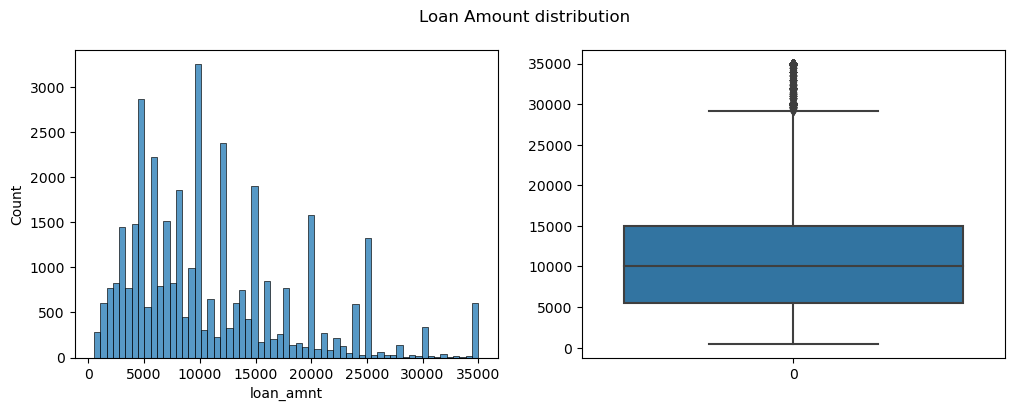

In [75]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(df["loan_amnt"])
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

Observations : The highest number of times the loan amount taken is 10000 and vert few people took loan amount of 30000 and above

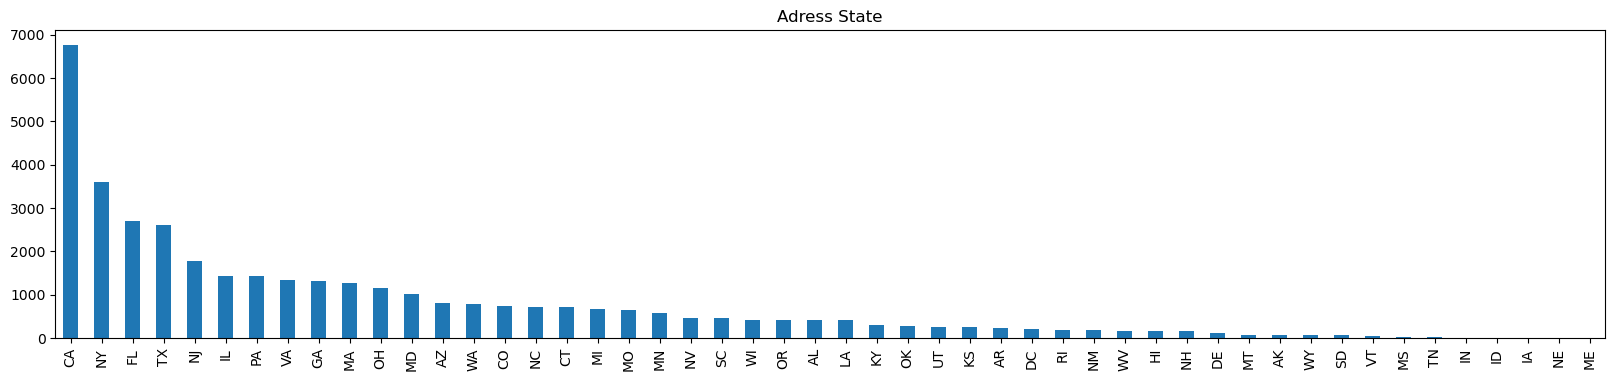

In [76]:
#Increasing the figure size of plot
plt.figure(figsize=(20,4))
#bar plot
df['addr_state'].value_counts().plot(kind='bar')
plt.title("Adress State")
plt.show()

Most number of loan borrowers are from state CA.

Univariate Analysif on funded amount


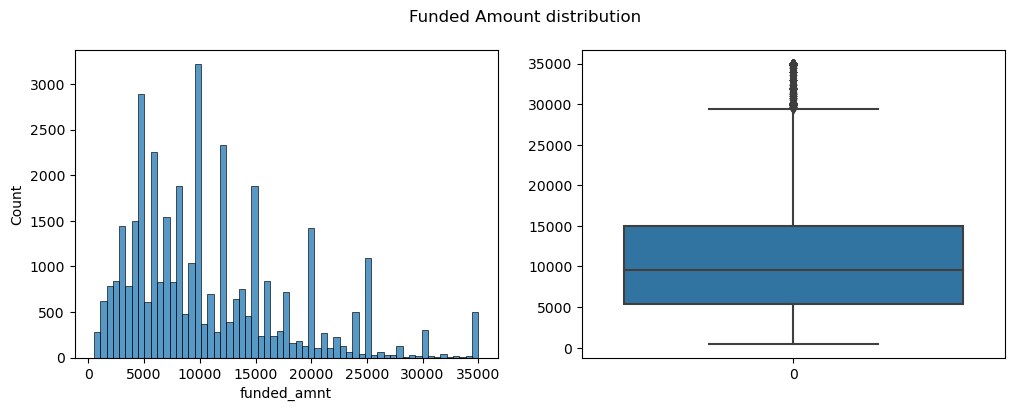

In [77]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(df["funded_amnt"])
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt)
#Single title for both subplots.
plt.suptitle('Funded Amount distribution')
plt.show()

Observations: It looks the same as above. 10000 is the amount that is given as loan most times Again 30000 loan amount is given very few times


Univariate Analysis on funded amount by investors


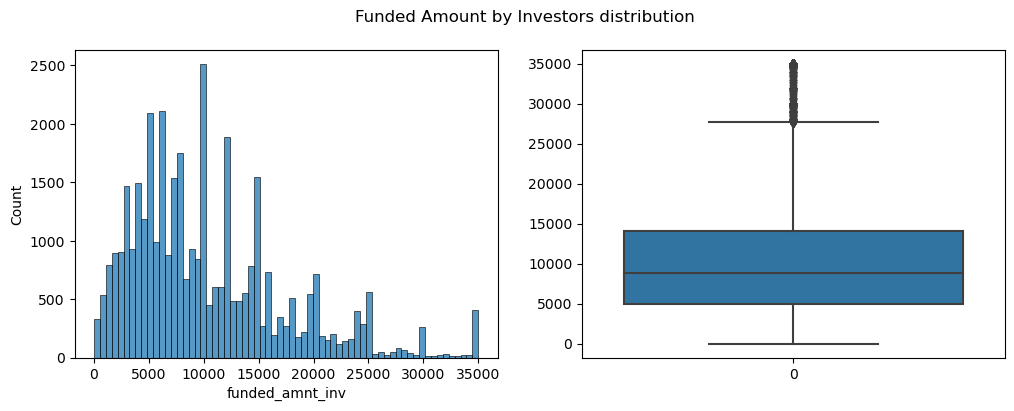

In [78]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.histplot(df["funded_amnt_inv"])
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt_inv)
#Single title for both subplots.
plt.suptitle('Funded Amount by Investors distribution')
plt.show()

Observations : Majority of the amount invested by investors is between 5000 and 10000 and very few in 25000 to 280000 and there is no amount invested between 30000 and 33000. No amount invested beyond 35000

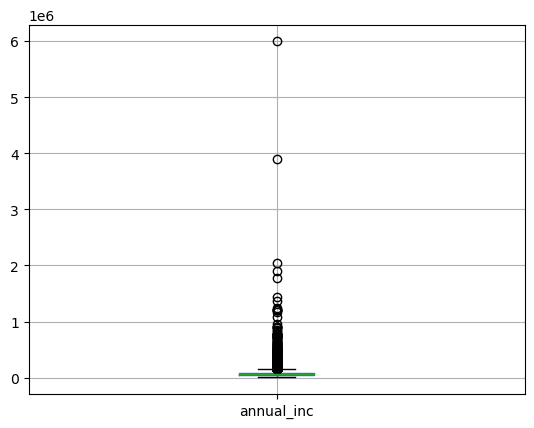

In [79]:
df.boxplot(column='annual_inc')
plt.show()

Annual Income seems to have outliers which needs to be removed. Annual Income can affect the loan amount to be provided

In [80]:
# Removing outliers from annual income using Inter quartile range
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['annual_inc'] >= Q1 - 1.5*IQR) & (df['annual_inc'] <= Q3 + 1.5*IQR)]

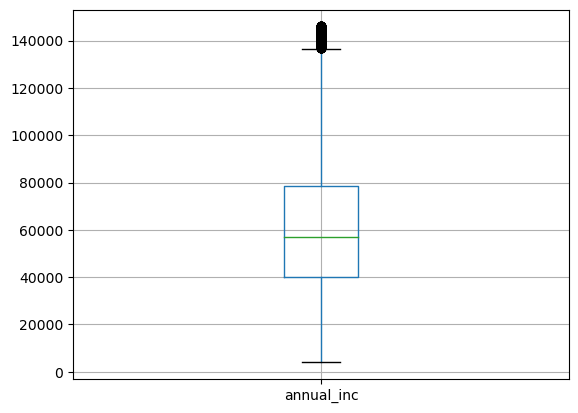

In [81]:
df.boxplot(column='annual_inc')
plt.show()

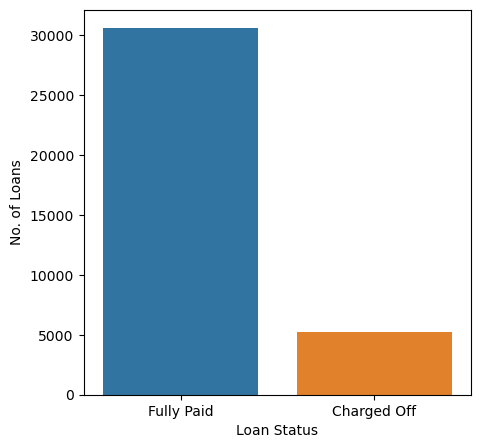

In [82]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=df)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

We have remvoed current status as it does not effect the laodn status approval.
Also we observer majority of is full paid and there are around 5000 and odd numbers which charged off

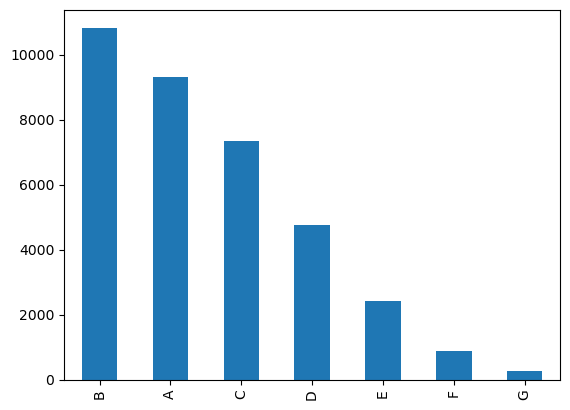

In [83]:
df['grade'].value_counts().plot(kind='bar')
plt.show()

Majority of grades of loan are of B type followed by a,c,d,e,f and g. G grade loan is the least here

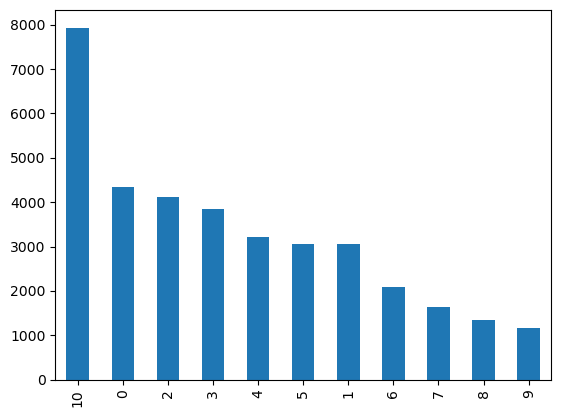

In [84]:
df['emp_length'].value_counts().plot(kind='bar')
plt.show()

Majority of the loan takes have employment length of 10 years or more. There are people whose employment tenure ie less than a year indicated by 0. Employment Tenure will also help banks decide whether to loan or not as this may indicate stability and more the tenure income will steadily increase.



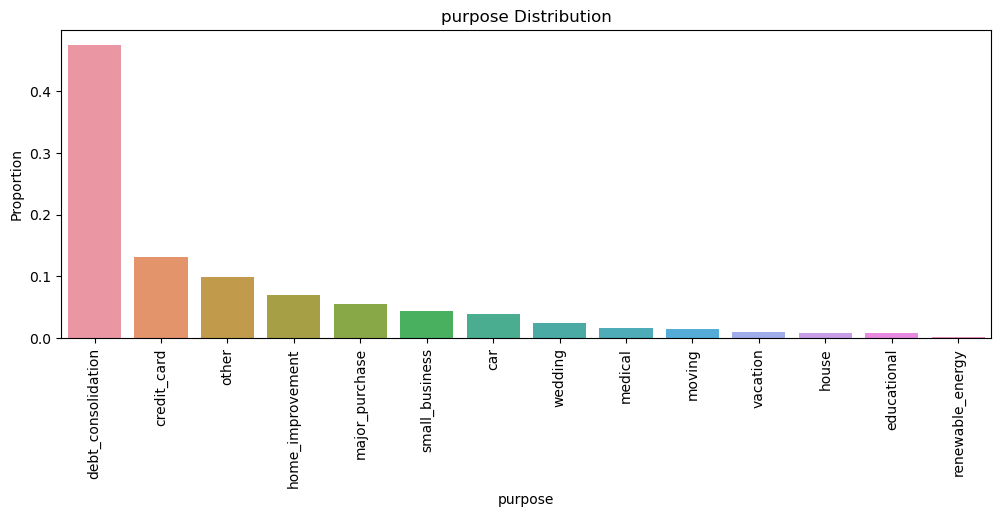

In [85]:
plt.figure(figsize=(12,4))
prob_df = df["purpose"].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='purpose', data=prob_df)
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('purpose'+' Distribution')
plt.show()

People who take loans for purpose deb_consolidation is highest and for renewablePenenrgy is the least

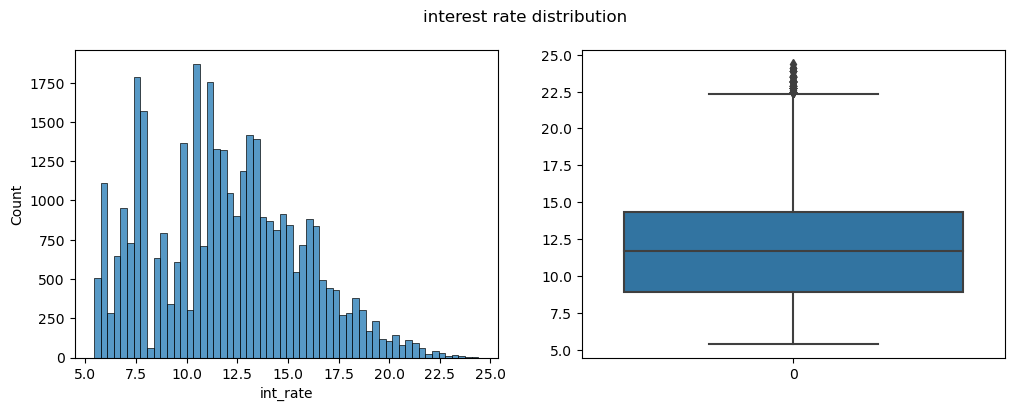

In [86]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["int_rate"])
plt.subplot(1,2,2)
sns.boxplot(data=df.int_rate)
plt.suptitle('interest rate distribution')
plt.show(block=True)

It looks like interest rate frequency is highest soem where around 8 and 14 percent. The least number of interest rates occur after 22.5 percent. 

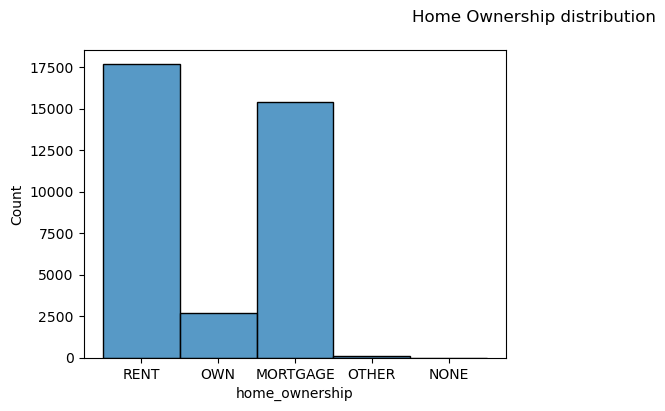

In [87]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["home_ownership"])
plt.suptitle('Home Ownership distribution')
plt.show(block=True)

In home ownership Rent and Mortage frequency is more compared to other while Own house ownership is very less.


In [88]:
df.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'year', 'month'],
      dtype='object')

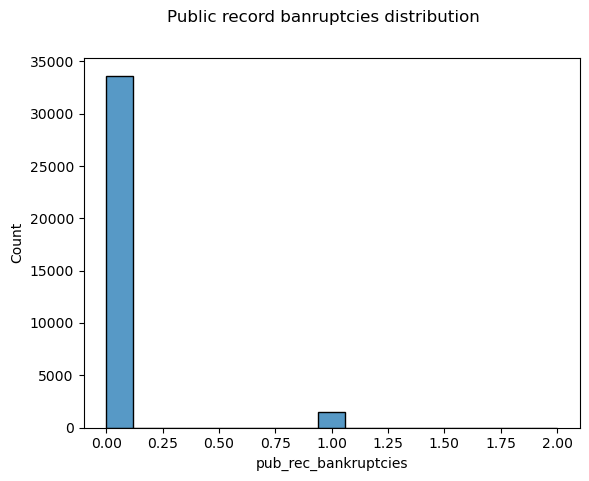

In [89]:
sns.histplot(df["pub_rec_bankruptcies"])
plt.suptitle('Public record banruptcies distribution')
plt.show()

Only 1% of people are bankrupt

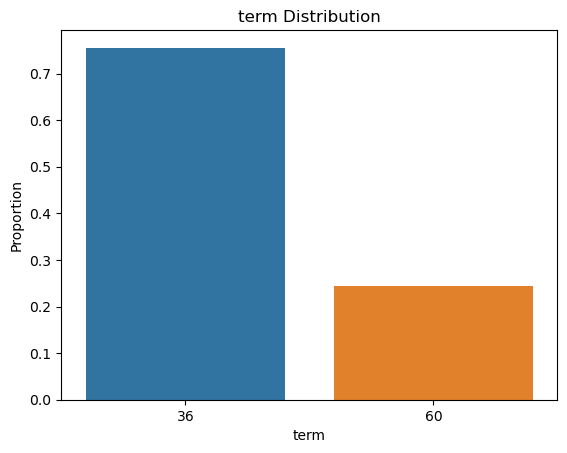

In [90]:
var = 'term'
prob_df = df[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

The most number of payments for the loan duration is 36 months

In [91]:
df_monthly = df.groupby(df['year'])['loan_amnt'].sum()

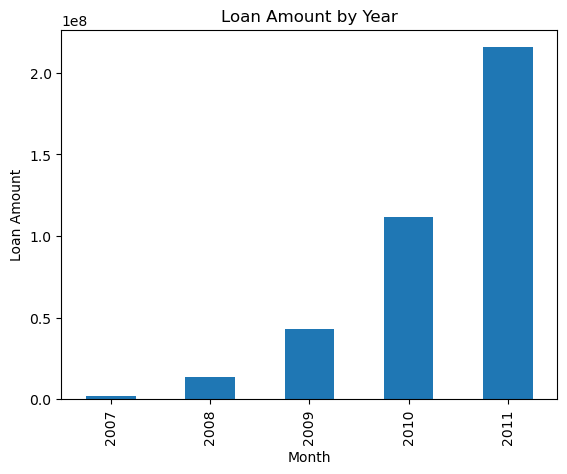

In [92]:
df_monthly.plot(kind='bar', title='Loan Amount by Year')
plt.xlabel('Month')
plt.ylabel('Loan Amount')
plt.show()

Loan amount given increases year by year.

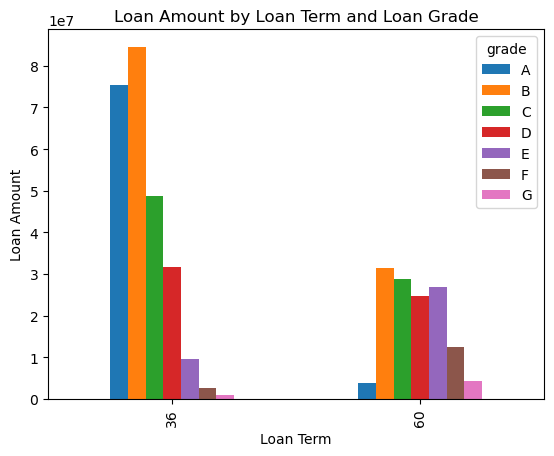

In [93]:
# Group the data by loan term and loan grade
df_grouped = df.groupby(['term', 'grade'])['loan_amnt'].sum()
# Plot a bar chart for loan amount by loan term and loan grade
df_grouped.unstack().plot(kind='bar')
plt.title('Loan Amount by Loan Term and Loan Grade')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()

B grade loans are apprioved more in case of 36 months term and 60 months. A grade loan is the least loans approved for 60 month loan tenure. 

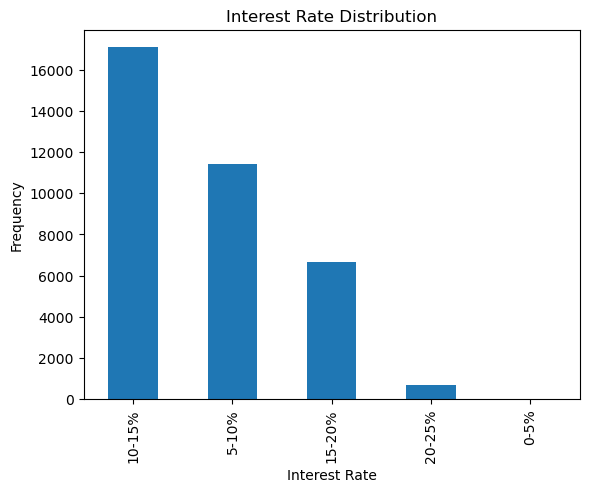

In [94]:
# Bin the data for interest rate
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%'])
# Plot a histogram for interest rate
df['int_rate_bin'].value_counts().plot(kind='bar')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

10-15% interest rate are more followe by 5-10%, 15.20% and 20-25% with Least being 20-25%

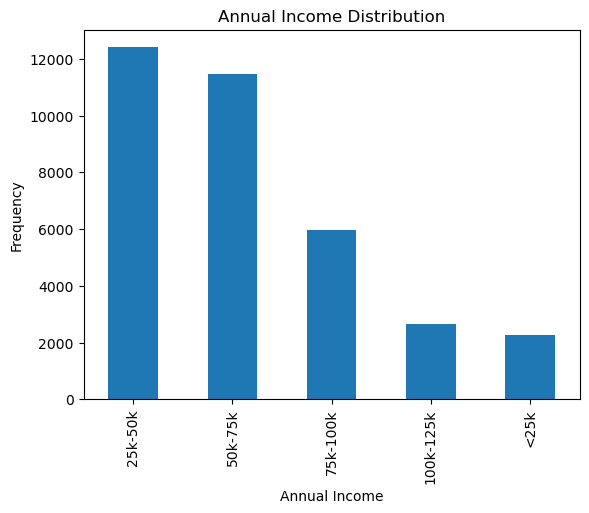

In [95]:
# Bin the data for annual income
df['annual_inc_bin'] = pd.cut(df['annual_inc'], bins=[0, 25000, 50000, 75000, 100000, 125000], labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k'])
# Plot a histogram for annual income
df['annual_inc_bin'].value_counts().plot(kind='bar')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


25k to 50k income is more frequent for people who apply laons. We have removed outliers in case of annual income as this might affect our analysis. 

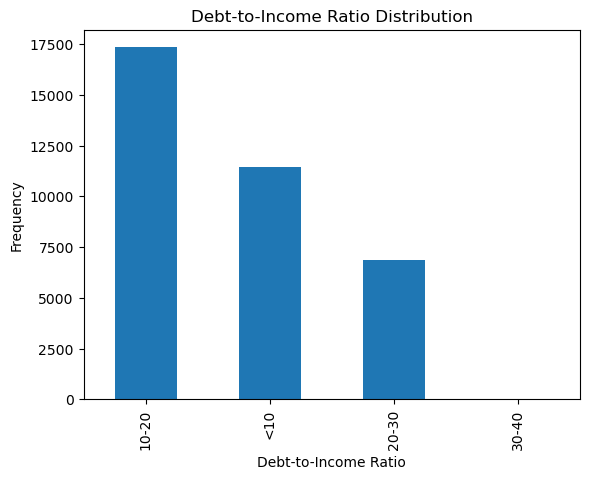

In [96]:
# Bin the data for debt-to-income ratio
df['dti_bin'] = pd.cut(df['dti'], bins=[0, 10, 20, 30, 40], labels=['<10', '10-20', '20-30', '30-40'])
# Plot a histogram for debt-to-income ratio
df['dti_bin'].value_counts().plot(kind='bar')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

If debt to income ratio is more the loan approved likely is less and if lender gives loans to such people the risk of defaulting is very high.

# Bivariate Analysis

In [97]:
df['annual_inc'].describe()

count     35814.000000
mean      61780.734054
std       28197.857345
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78688.000000
max      146000.000000
Name: annual_inc, dtype: float64

In [98]:
df['annual_inc'].median()


57000.0

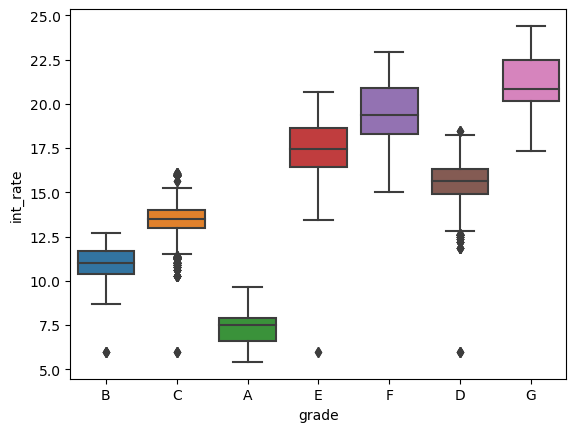

In [99]:
# Create a box plot
sns.boxplot(x='grade', y='int_rate', data=df)
plt.show()

A grade loan type seems to be having the least interest rate among all grades.

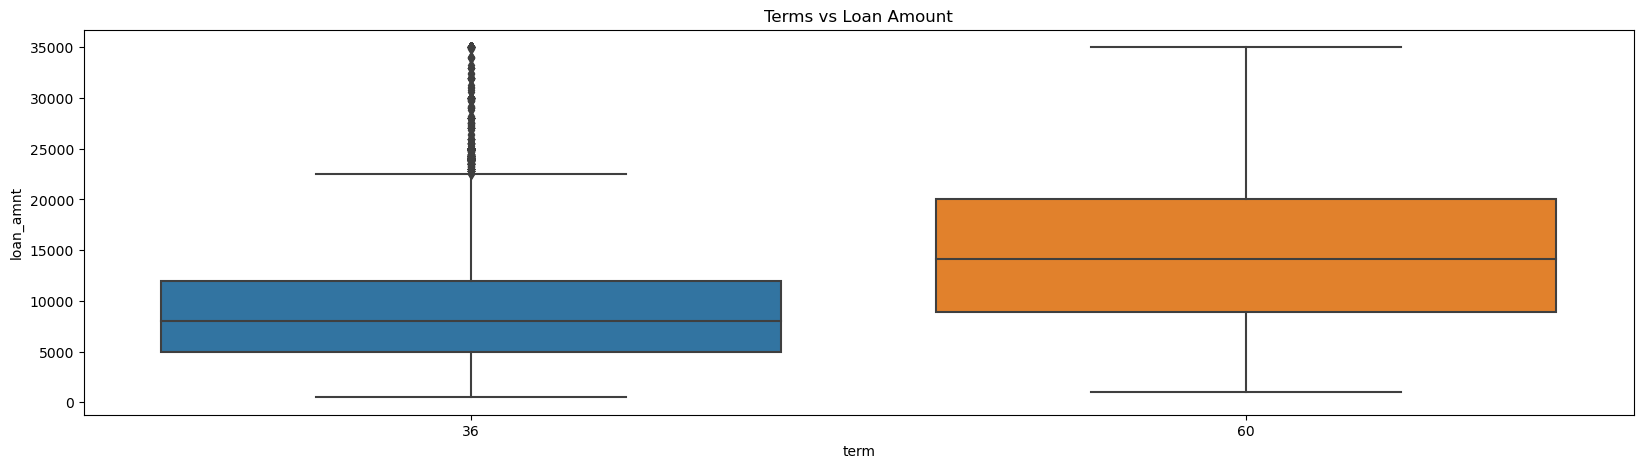

In [100]:
plt.figure(figsize=(20,5))
sns.boxplot(x='term', y=df.loan_amnt, data=df)
plt.title('Terms vs Loan Amount')
plt.show()

Higher amount of loan leads to higher duration of paying loan

This shows that there are more number of people who have higher income. However with this alone it is difficult to come to conclusion on whether loan payer can pay or default

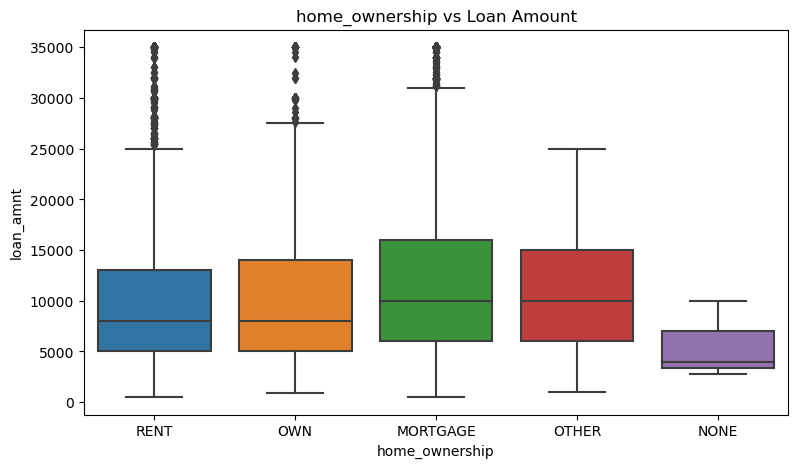

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=df.loan_amnt, data=df)
plt.title('home_ownership vs Loan Amount')
plt.show()

We can see that people whose owner ship is MORTGAGE hasve taken higher loan amount. having own house will get greater loan amount than rented ownership as own house could be asset for loan recovery. In case of mortage that is collateral so lenders has some gurantee on loan recovery. People who don't ahve any collateral do not get much loan amount

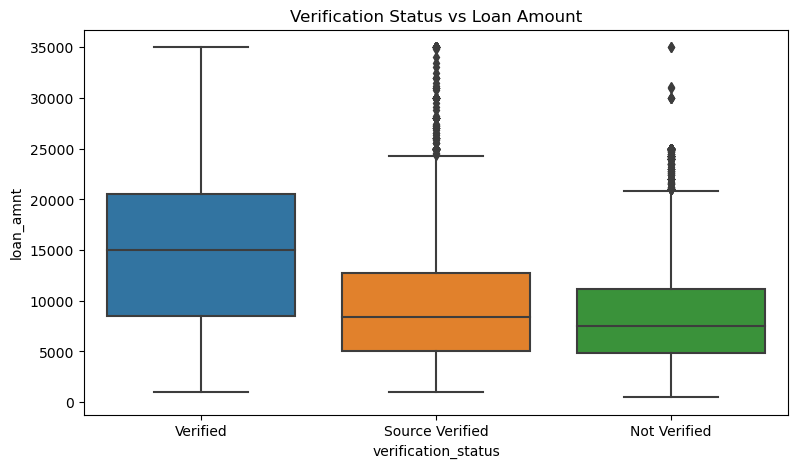

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y=df.loan_amnt, data=df)
plt.title('Verification Status vs Loan Amount')
plt.show()

If the income is verified by LC the loan amount given is higher. Even if source of income is verified the loan amount givne is higher compared to those not verified.

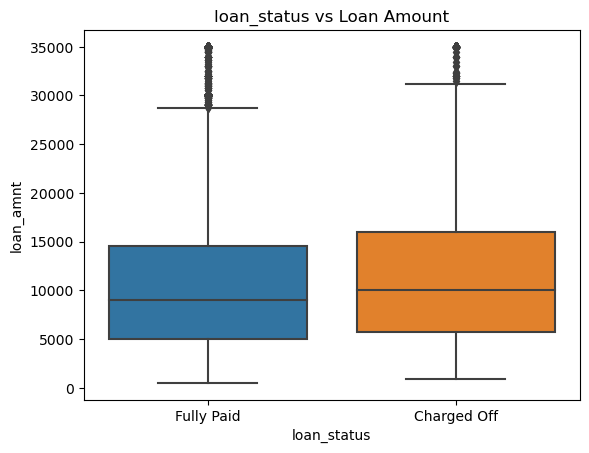

In [103]:
sns.boxplot(x='loan_status', y=df.loan_amnt, data=df)
plt.title('loan_status vs Loan Amount')
plt.show()

Charged Off has higher loan amount than fully paid.

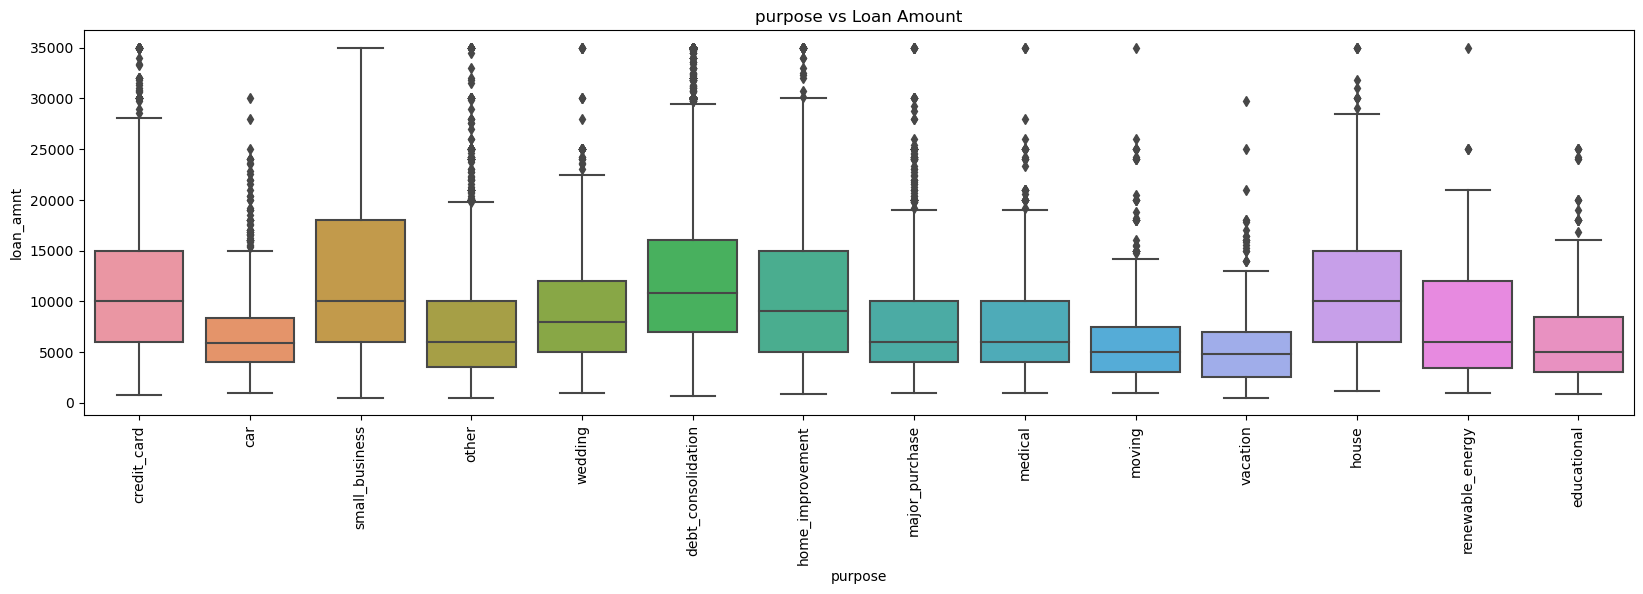

In [104]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=df.loan_amnt, data=df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')
plt.show()

Small Business have taken higher loan amount

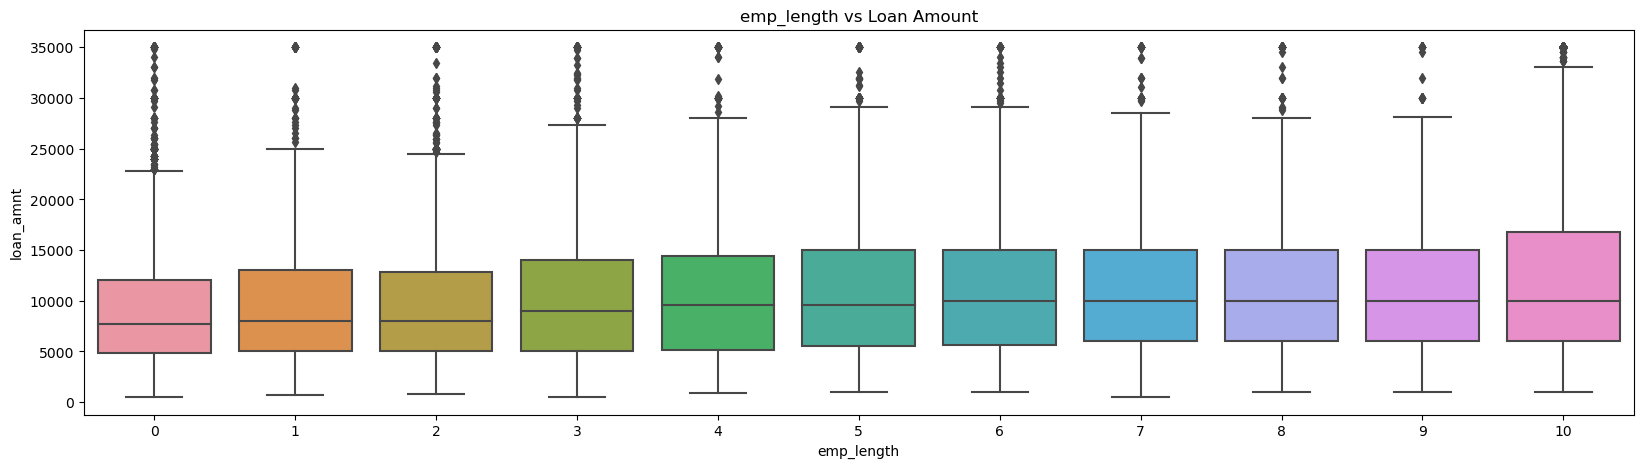

In [105]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=df.loan_amnt, data=df)
plt.title('emp_length vs Loan Amount')
plt.show()

Employment of 10 years or more are likely to taken more loan amount

Looking at the median it looks like with increase in employee length it is likely that loan amount increases

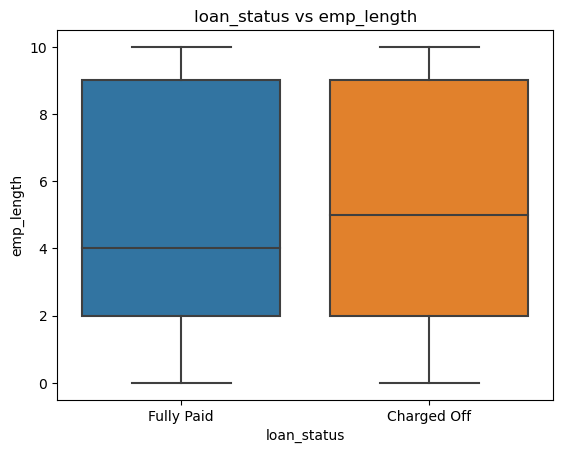

In [106]:
sns.boxplot(x='loan_status', y=df.emp_length, data=df)
plt.title('loan_status vs emp_length')
plt.show()

Looking at the box plot above the median increases in case of charged off indicating employee length can also affect how loan borrowers default. In this case the increase in employee tenure increases the risk of person becoming a defaulter.

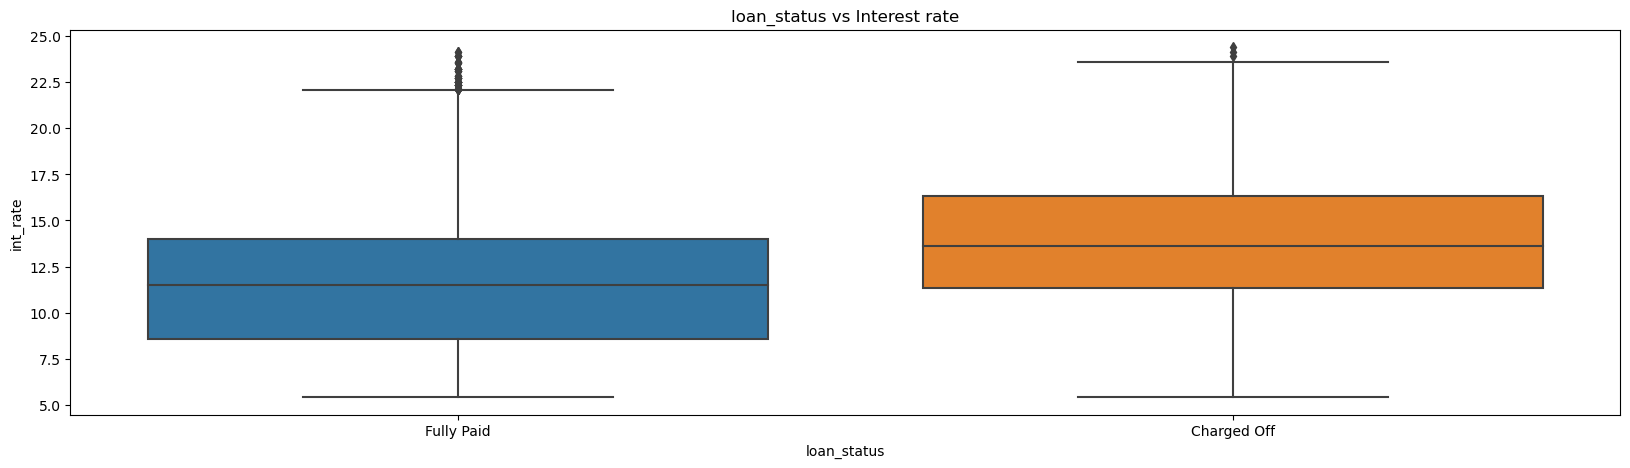

In [107]:
plt.figure(figsize=(20,5))
sns.boxplot(x='loan_status', y=df.int_rate, data=df)
plt.title('loan_status vs Interest rate')
plt.show()

Higher the interest rate more people are likely to tbe chared off.

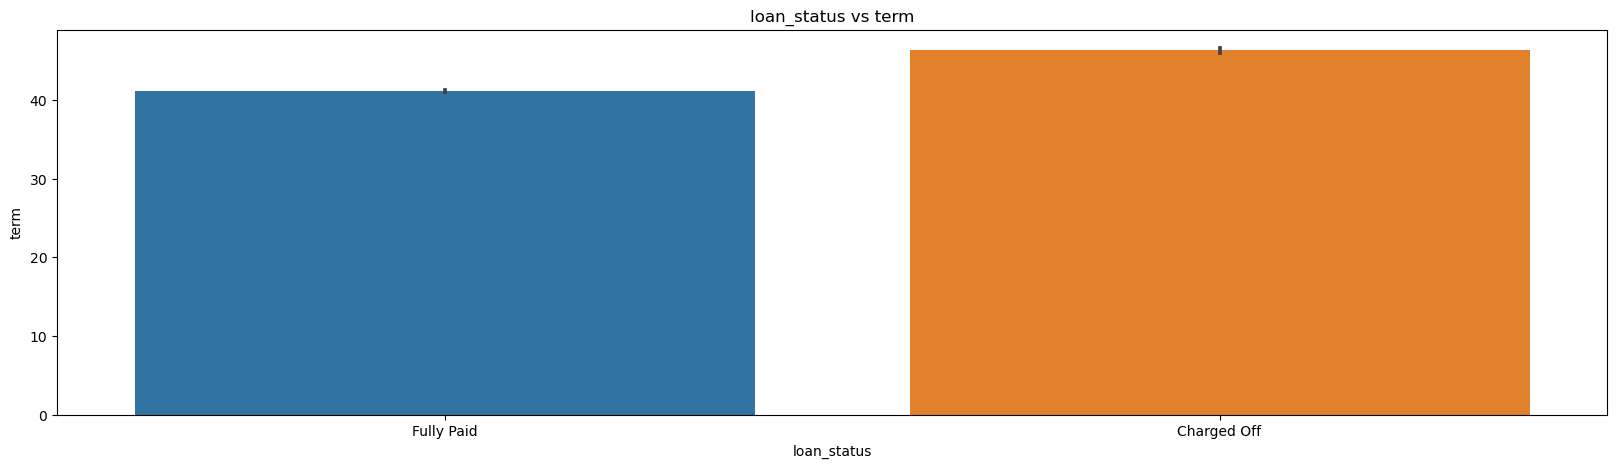

In [108]:
plt.figure(figsize=(20,5))
sns.barplot(x='loan_status', y=df.term, data=df)
plt.title('loan_status vs term')
plt.show()

As term increases more people are likely to default

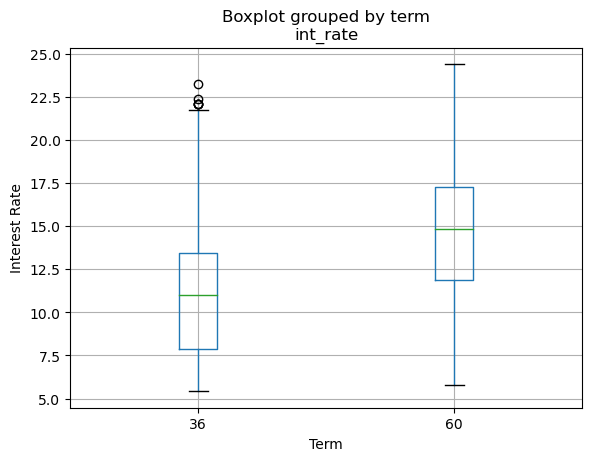

In [138]:
ax = df.boxplot(column='int_rate', by='term')
ax.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

Interest rate is higher is 60 months. It's natural also loan amoutn will be greater.

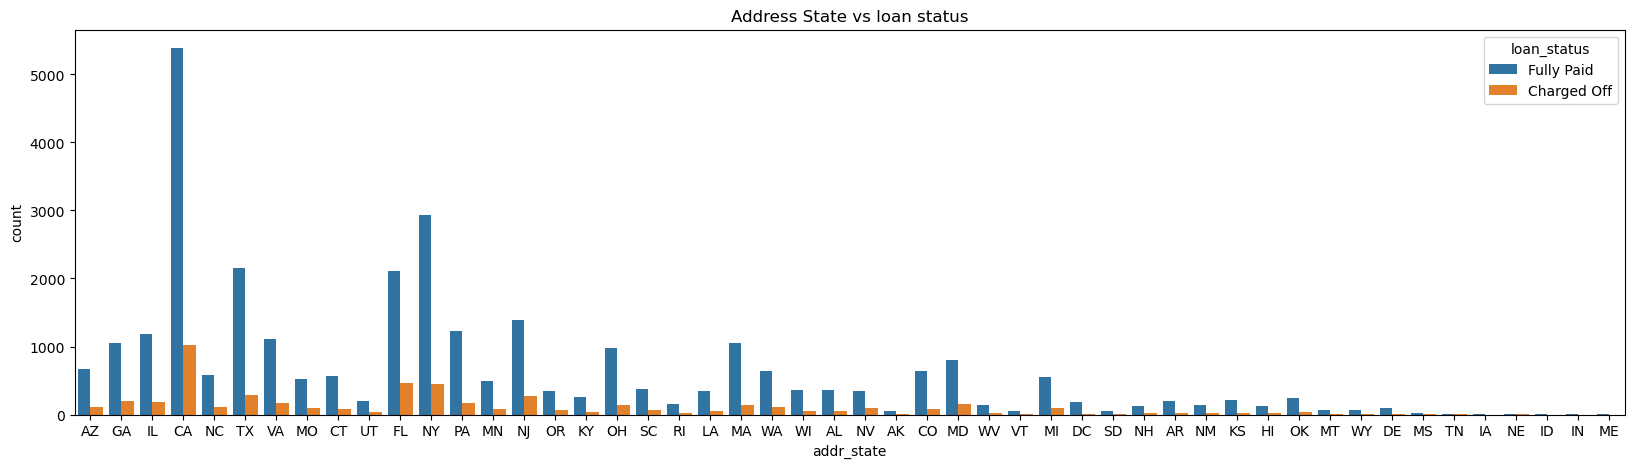

In [109]:
plt.figure(figsize=(20,5))
sns.countplot(x='addr_state', hue='loan_status', data=df)
plt.title('Address State vs loan status')
plt.show()

CA state has highest fully paid loan people. It also has highest charged off people.

There are more number of people who defautled from the address states NE,ID,TN,MS,WY,MT,De

In [110]:
len(df['loan_status'])

35814

In [111]:
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [112]:
states = crosstab(df,'addr_state')
states

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
addr_state,,,,
AK,13,56,69,18.841
AL,49,357,406,12.069
AR,25,196,221,11.312
AZ,108,665,773,13.972
CA,1027,5387,6414,16.012
CO,89,633,722,12.327
CT,87,574,661,13.162
DC,14,185,199,7.035
DE,12,94,106,11.321


In [116]:
states.describe()

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
count,45.000000,45.000000,45.000000,45.000000
mean,115.622222,679.622222,795.244444,13.907156
std,174.457118,950.082180,1122.550974,3.018584
min,2.000000,15.000000,17.000000,3.947000
25%,24.000000,145.000000,174.000000,12.069000
50%,62.000000,354.000000,414.000000,13.908000
75%,141.000000,805.000000,957.000000,15.883000
max,1027.000000,5387.000000,6414.000000,21.573000


There are some states where loan taken are very less. This can cause bias when analysing

In [117]:
# dropping states where loan takers are less than 10
filter_states = df.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]
loan_filter_states = df.drop(labels = df[df.addr_state.isin(filter_states.index)].index)

In [118]:
states = crosstab(loan_filter_states,'addr_state')
states

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
addr_state,,,,
AK,13,56,69,18.841
AL,49,357,406,12.069
AR,25,196,221,11.312
AZ,108,665,773,13.972
CA,1027,5387,6414,16.012
CO,89,633,722,12.327
CT,87,574,661,13.162
DC,14,185,199,7.035
DE,12,94,106,11.321


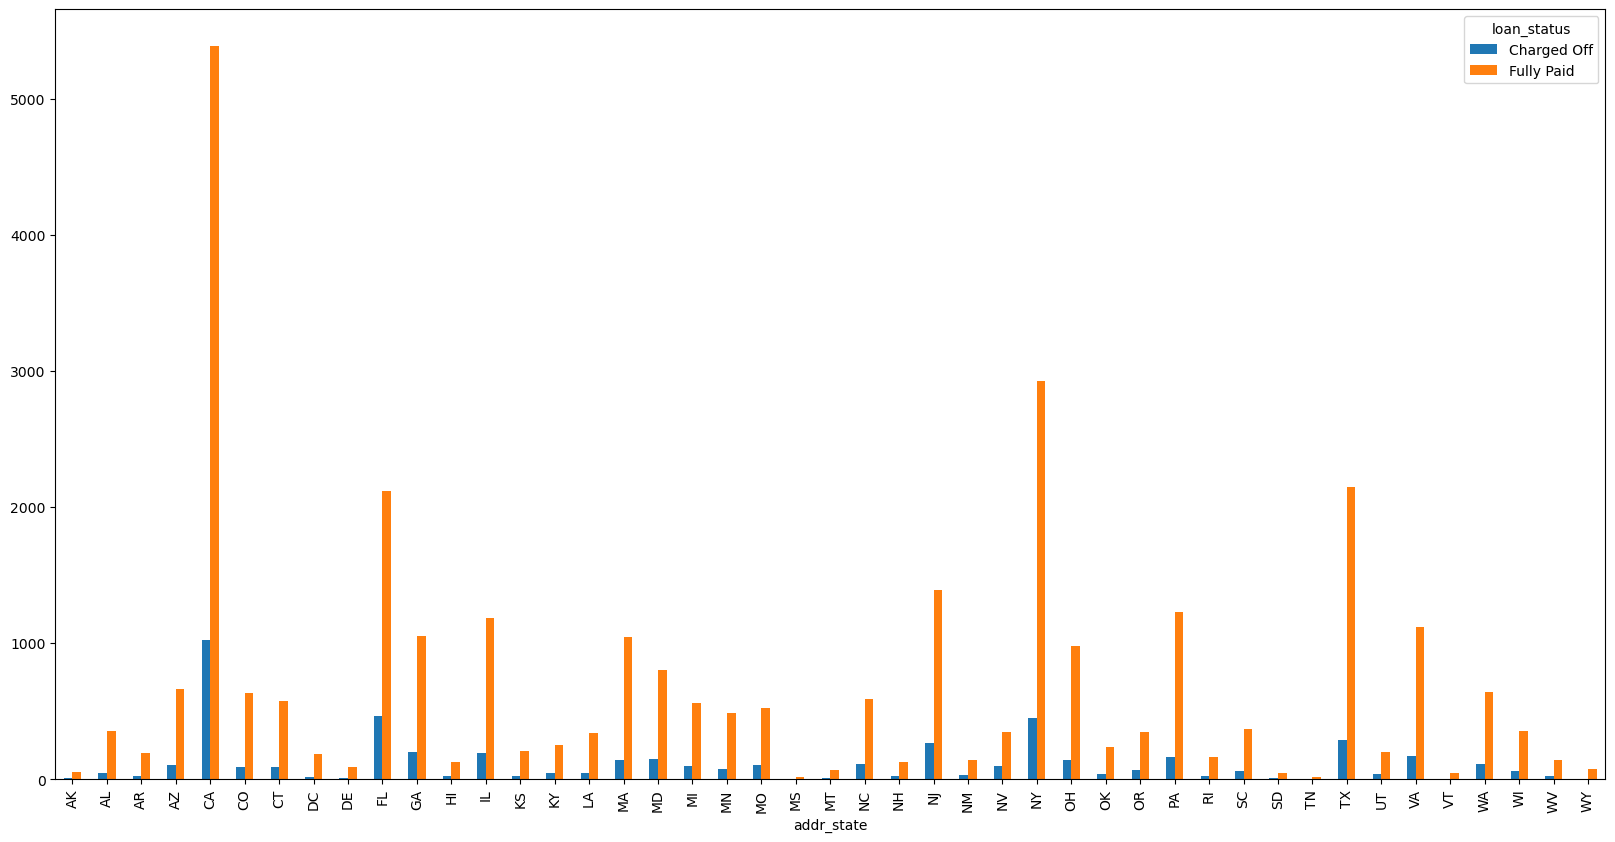

In [127]:
# Plot bar chart for states = crosstab(df,'addr_state')
barplot =  states.iloc[:,0:2]
barplot.plot(kind='bar', stacked=False, figsize=(20,10))
plt.show()

Maximum no. of loans are applied by people from CA.
Maximum no. of loans are charged off for people of NV.

In [122]:
#Plotting the grade w.r.t % of loans charged off and no. of loan applicants. 
grade = crosstab(df,'grade')
grade


loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
grade,,,,
A,550,8759,9309,5.908
B,1311,9531,10842,12.092
C,1267,6078,7345,17.250
D,1052,3703,4755,22.124
E,647,1777,2424,26.691
F,285,588,873,32.646
G,95,171,266,35.714


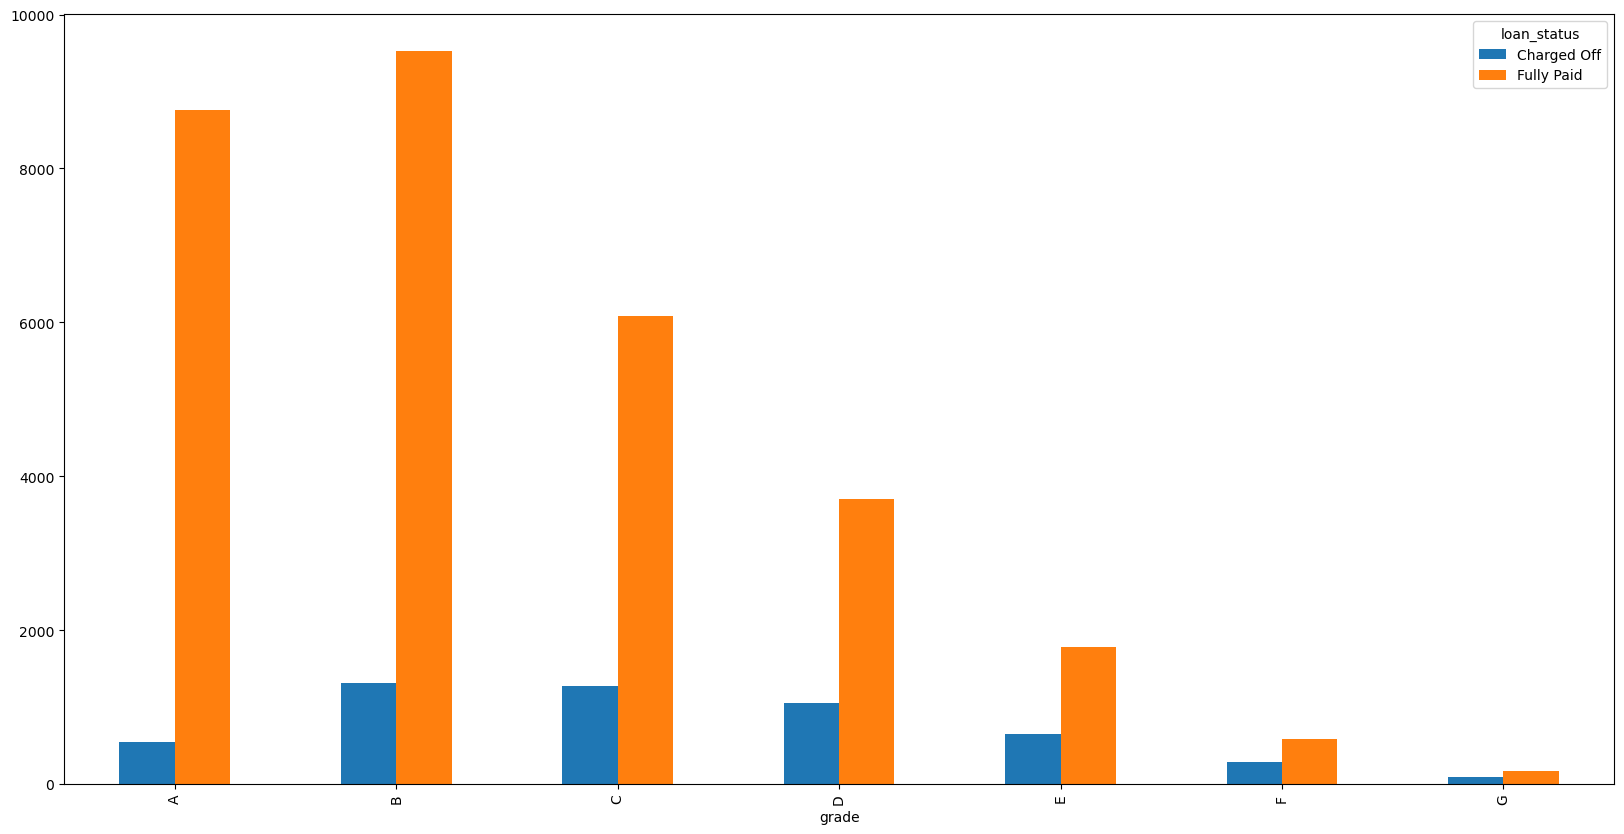

In [125]:
barplot =  grade.iloc[:,0:2]
barplot.plot(kind='bar', stacked=False, figsize=(20,10))
plt.show()

Grade A loan has less charged Off to fully paid ratio compared to other grades

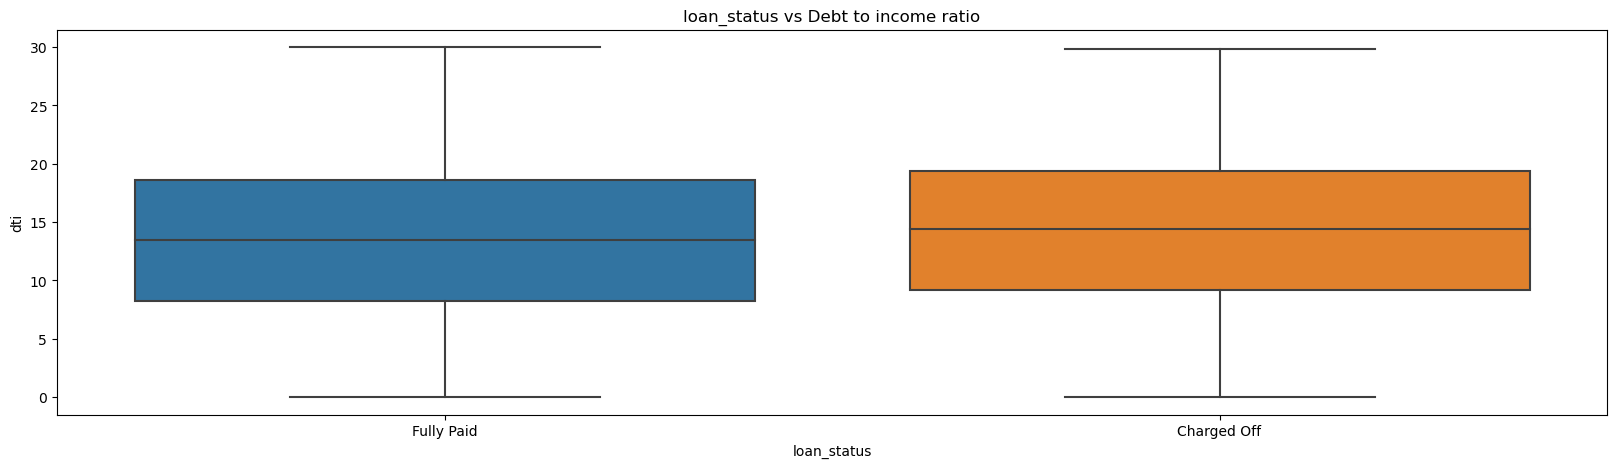

In [715]:
plt.figure(figsize=(20,5))
sns.boxplot(x='loan_status', y=df.dti, data=df)
plt.title('loan_status vs Debt to income ratio')
plt.show()

People with more debt to income ratio are more likely to default

In [716]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'income_group'],
      dtype='object')

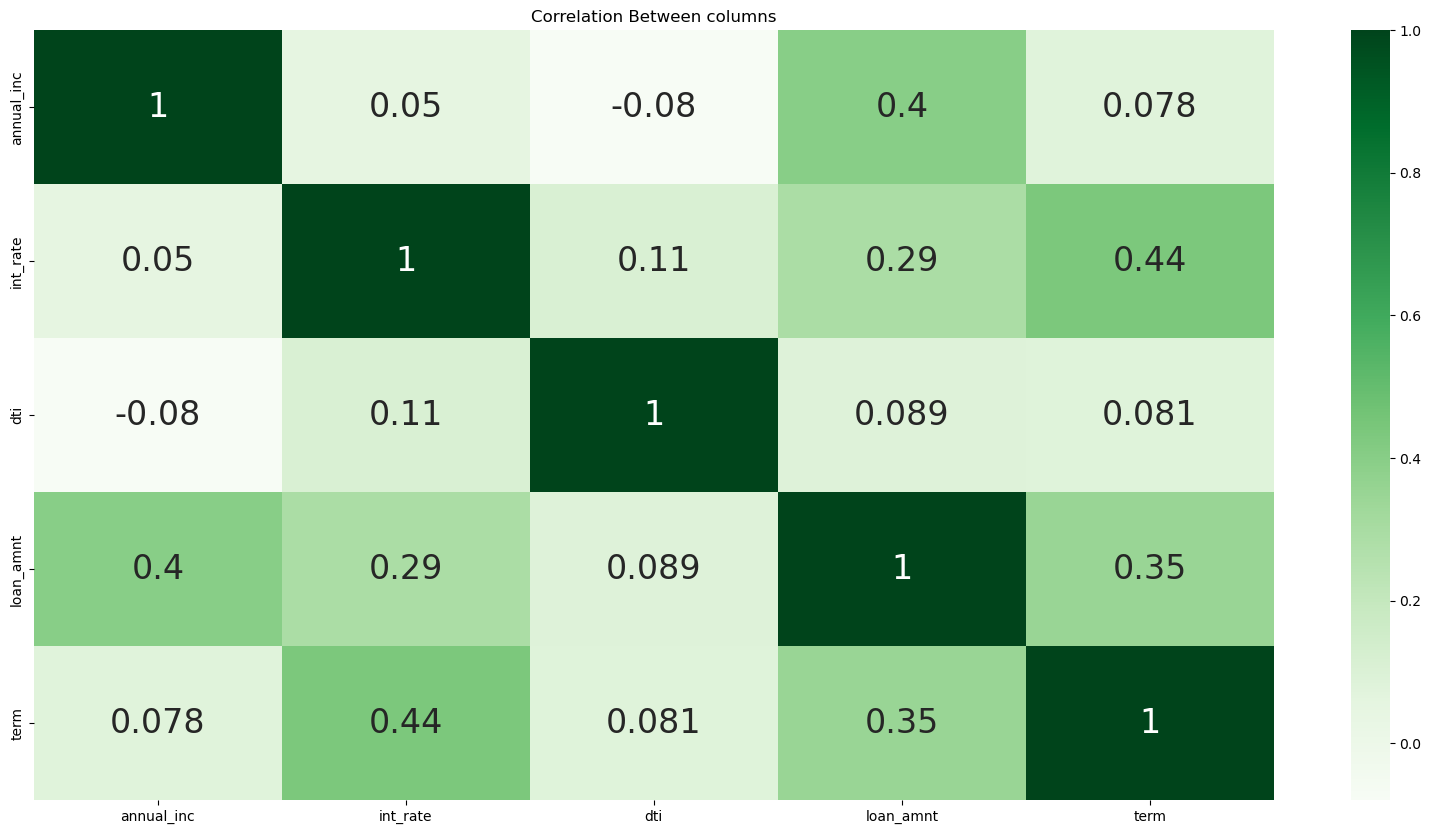

In [717]:
plt.figure(figsize=(20,10))
corr = df[[ 'annual_inc', 'int_rate', 'dti','loan_amnt','term']].corr()
sns.heatmap(corr,cmap='Greens', annot=True,annot_kws={"size": 24})
plt.title("Correlation Between columns")
plt.show()

Annual Income and debt to income ratio has a negative co-relation. If annual income increases then loan amount approved also increases. Higher loan amount take longer to be repaid, hence the term increased for loan amount. The interest rate also increases with term.